## GMM Example in scikit-learn

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
rng = np.random.RandomState(seed=1)

X = np.concatenate([rng.normal(-1, 1.5, 350),
                    rng.normal(0, 1, 500),
                    rng.normal(3, 0.5, 150)]).reshape(-1, 1)

# Fit models with 1-10 components
k_arr = np.arange(10) + 1
models = [
    GaussianMixture(n_components=k).fit(X)
    for k in k_arr
]

## Mixture model plot function

In [3]:
# Plot function
def plot_mixture(gmm, X, show_legend=True, ax=None):
    if ax is None:
        ax = plt.gca()
        
    # Compute PDF of whole mixture
    x = np.linspace(-6, 6, 1000)
    logprob = gmm.score_samples(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    
    # Compute PDF for each component
    responsibilities = gmm.predict_proba(x.reshape(-1, 1))
    pdf_individual = responsibilities * pdf[:, np.newaxis]

    # Plot data histogram
    ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4, label='Data')
    
    # Plot PDF of whole model
    ax.plot(x, pdf, '-k', label='Mixture PDF')
    
    # Plot PDF of each component
    ax.plot(x, pdf_individual, '--', label='Component PDF')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    if show_legend:
        ax.legend()

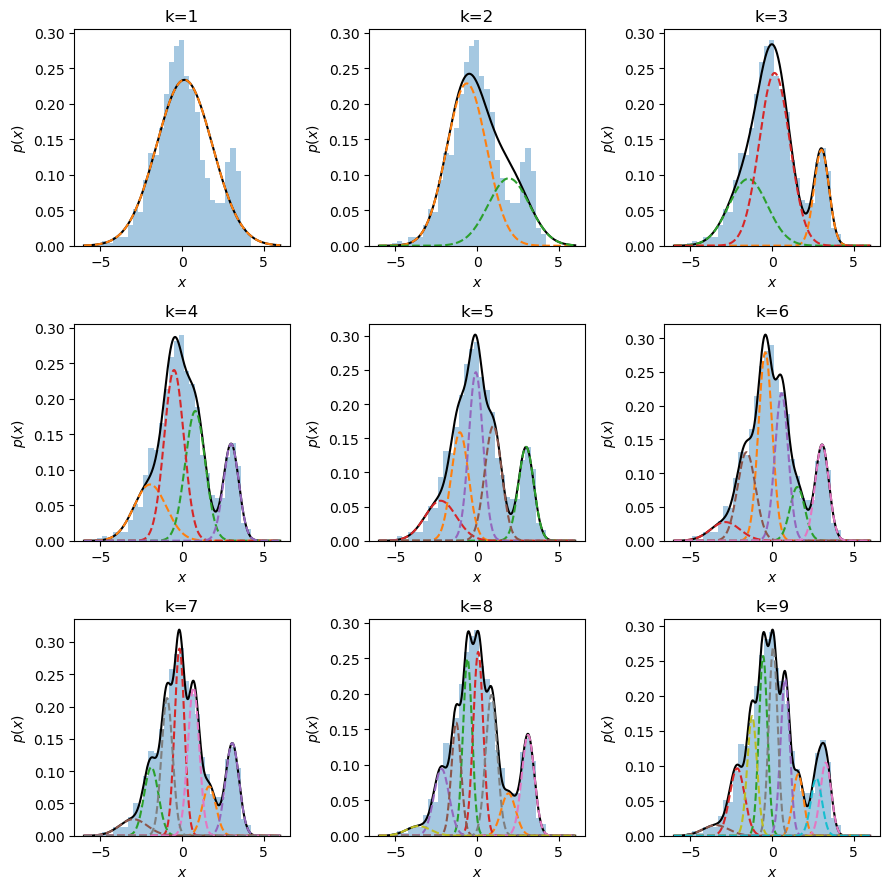

In [4]:
# Show all models for n_components 1 to 9
_, axes = plt.subplots(3, 3, figsize=np.array([3,3])*3, dpi=100) 
for gmm, ax in zip(models, axes.ravel()):
    plot_mixture(gmm, X, show_legend=False, ax=ax)
    ax.set_title(f'k={gmm.n_components}')
plt.tight_layout()

# How to choose the number of components $k$?
- AIC and BIC are computable criteria based on information theory to help pick $k$

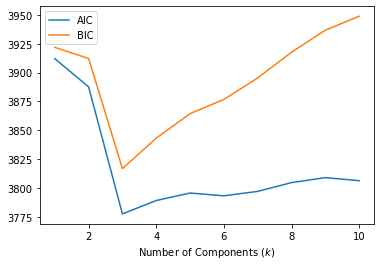

In [5]:
# Compute metrics to determine best hyperparameter
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

# Plot these metrics
plt.plot(k_arr, AIC, label='AIC')
plt.plot(k_arr, BIC, label='BIC')
plt.xlabel('Number of Components ($k$)')
plt.legend()

### Show best model according to AIC criteria

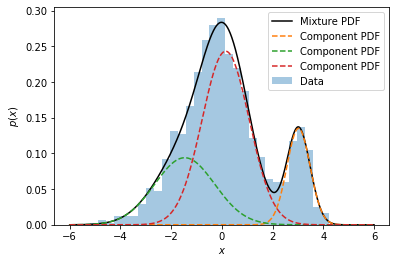

In [6]:
gmm_best = models[np.argmin(AIC)]
plot_mixture(gmm_best, X)

# Back to motivating k-means example with unequal variance

(-7.679357622326382, 38.85413904249712, -1.2688240342438202, 5.881284905565782)

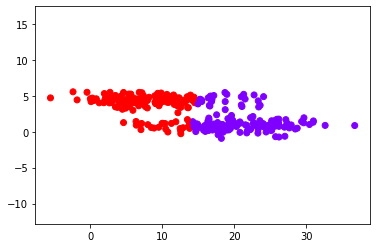

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X3, y_true = make_blobs(n_samples=300, centers=2,
                        cluster_std=0.60, random_state=0)
X3[:, 0] = X3[:, 0]*10

kmeans = KMeans(n_clusters=2, random_state=0).fit(X3)
plt.scatter(X3[:,0], X3[:,1], c=kmeans.labels_, cmap='rainbow')
plt.axis('equal')

# GMMs can capture unequal covariance along different dimensions

(-7.679357622326382, 38.85413904249712, -1.2688240342438202, 5.881284905565782)

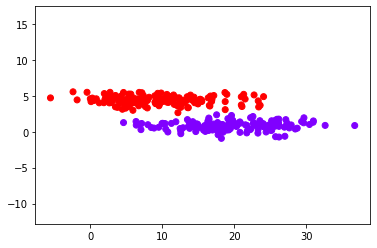

In [8]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0).fit(X3)
gmm_labels = gmm.predict(X3)
plt.scatter(X3[:,0], X3[:,1], c=gmm_labels, cmap='rainbow')
plt.axis('equal')